<a href="https://colab.research.google.com/github/kaneshow/AirSense_India/blob/main/airSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 72.9M/72.9M [00:01<00:00, 62.2MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12
First few rows:
         City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Missing Values:
 City              0
Date              0
PM2.5       

<ipython-input-1-b682db8293aa>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AQI'] = (data['PM2.5'] + data['PM10'] + data['NO2']) / 3



Negative Values Detected:
 Empty DataFrame
Columns: [Date, PM2.5, PM10, NO2, CO, Ozone, AQI]
Index: []

Summary Statistics:
                                 Date         PM2.5          PM10  \
count                          29531  29531.000000  29531.000000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103   
min              2015-01-01 00:00:00      0.040000      0.010000   
25%              2017-04-16 00:00:00     32.150000     79.315000   
50%              2018-08-05 00:00:00     58.030000    118.127103   
75%              2019-09-03 00:00:00     72.450000    118.127103   
max              2020-07-01 00:00:00    949.990000   1000.000000   
std                              NaN     59.414476     71.500953   

                NO2            CO         Ozone           AQI  
count  29531.000000  29531.000000  29531.000000  29531.000000  
mean      28.560659      2.248598     34.491430     71.379447  
min        0.010000      0.000000      0.010000      0.480000  
25%  

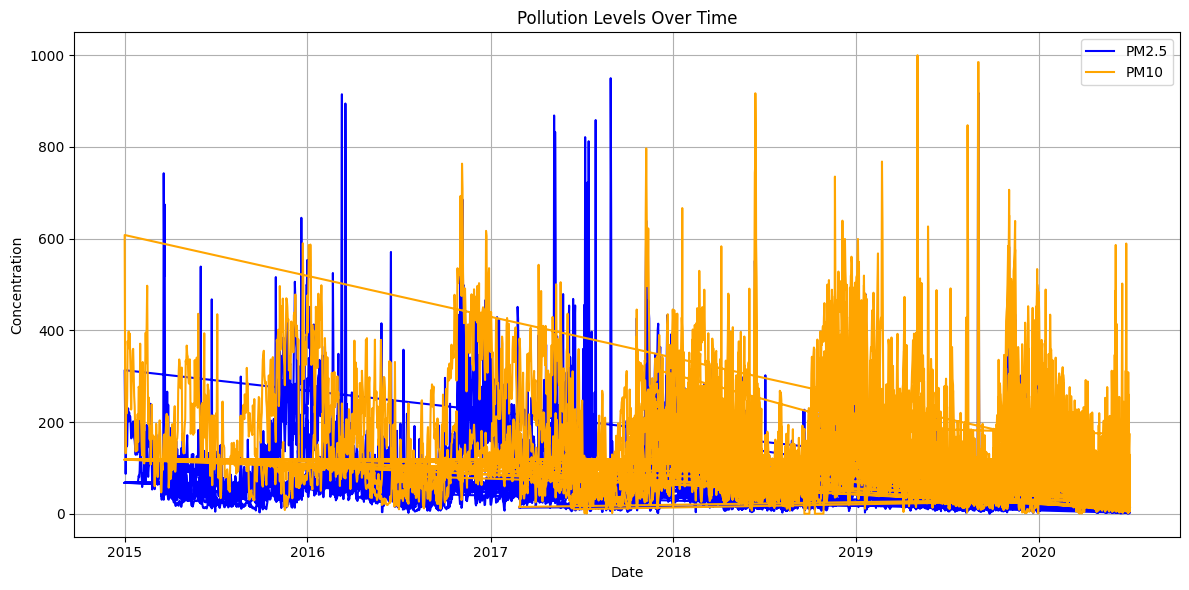


PM2.5 Outliers:
              PM2.5        PM10    NO2     CO   Ozone         AQI
Date                                                            
2015-02-01  135.99  118.127103  42.08  43.48  102.70   98.732368
2015-02-02  178.33  118.127103  35.31  54.56  107.38  110.589034
2015-02-03  139.70  118.127103  28.40  30.61   73.60   95.409034
2015-02-14  177.33  118.127103  47.58  37.49   36.47  114.345701
2015-02-20  140.29  118.127103  36.14  33.84   40.98   98.185701
...            ...         ...    ...    ...     ...         ...
2019-01-10  135.46  227.110000  67.15   1.08  121.45  143.240000
2019-01-14  203.05  306.160000  80.39   1.71   83.48  196.533333
2019-01-21  143.69  283.170000  62.47   1.30   42.56  163.110000
2019-11-03  144.72  259.910000  47.03   1.13   55.81  150.553333
2020-01-14  177.20  326.400000  79.29   2.08   44.07  194.296667

[2736 rows x 6 columns]


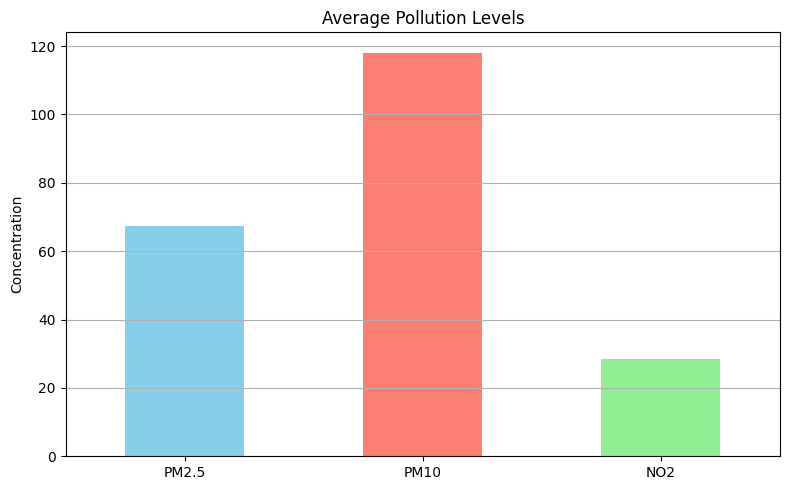

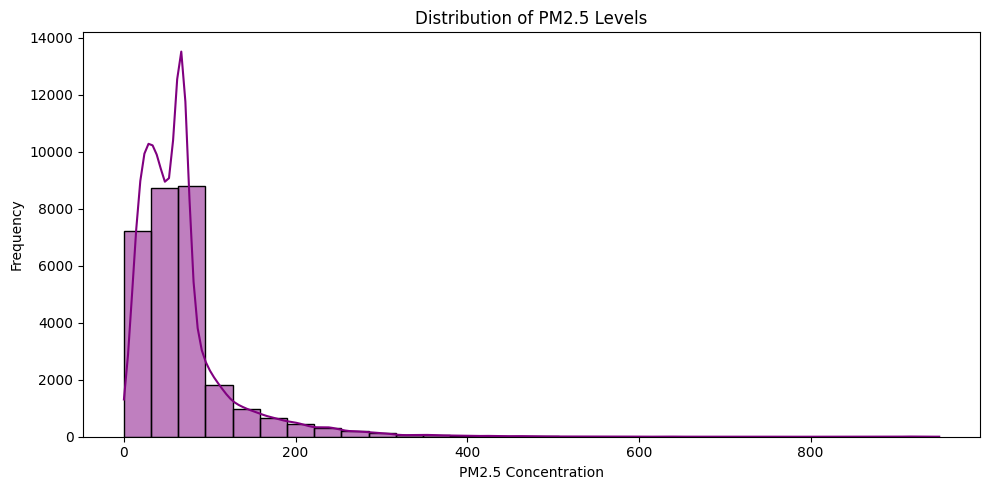

In [1]:
# ========================================
# Review 1: Air Quality EDA & Preprocessing
# Dataset: "Air Quality Data in India" by Rohan Rao
# File Used: city_day.csv
# ========================================

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Step 2: Download Dataset from Kaggle
dataset_path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")
print("Dataset downloaded to:", dataset_path)

# Step 3: Load the 'city_day.csv' File
data = pd.read_csv(f"{dataset_path}/city_day.csv")
print("First few rows:\n", data.head())

# Step 4: Handle Missing Values
print("\nMissing Values:\n", data.isnull().sum())
data.fillna(data.mean(numeric_only=True), inplace=True)

# Step 5: Convert 'Date' Column to Datetime Format
data['Date'] = pd.to_datetime(data['Date'])

# Step 6: Select and Rename Relevant Columns
data.rename(columns={'O3': 'Ozone'}, inplace=True)
features = ['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'Ozone']
data = data[features]

# Step 7: Feature Engineering - Create AQI (Simple Average)
data['AQI'] = (data['PM2.5'] + data['PM10'] + data['NO2']) / 3

# Step 8: Data Integrity Checks
print("\nData Types:\n", data.dtypes)
print("\nNegative Values Detected:\n", data[data[['PM2.5', 'PM10', 'NO2', 'CO', 'Ozone']] < 0].dropna(how='all'))

# Step 9: Summary Statistics
print("\nSummary Statistics:\n", data.describe())

# Step 10: Time Series Visualization of Pollutants
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['PM10'], label='PM10', color='orange')
plt.title('Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Outlier Detection using IQR (PM2.5)
Q1 = data['PM2.5'].quantile(0.25)
Q3 = data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['PM2.5'] < (Q1 - 1.5 * IQR)) | (data['PM2.5'] > (Q3 + 1.5 * IQR))]
print("\nPM2.5 Outliers:\n", outliers)

# Step 12: Log Transformation for Skewed Data
data['PM2.5_log'] = np.log(data['PM2.5'] + 1)

# Step 13: Bar Chart of Average Pollution Levels
avg_pollution = data[['PM2.5', 'PM10', 'NO2']].mean()
avg_pollution.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Pollution Levels')
plt.ylabel('Concentration')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 14: Histogram of PM2.5 Levels
plt.figure(figsize=(10, 5))
sns.histplot(data['PM2.5'], bins=30, kde=True, color='purple')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()